# Exploratory Data Analysis - Sports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load Datasets

### 1.1 Deliveries data

In [2]:
deliveries = pd.read_csv(r"/home/praveen/Desktop/sparks/Tasks/IPL/Indian Premier League/deliveries.csv")

### 1.2 Match data

In [3]:
matches = pd.read_csv(r"/home/praveen/Desktop/sparks/Tasks/IPL/Indian Premier League/matches.csv")

In [4]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


### Total Seasons

In [6]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### Total matches in each season

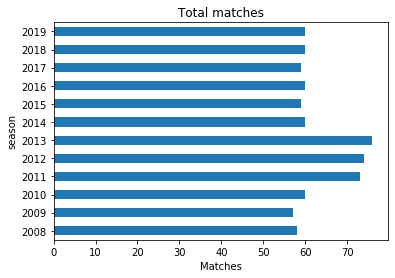

In [7]:
matches.groupby('season')['id'].count().plot(kind='barh')
plt.title('Total matches')
plt.xlabel('Matches')
plt.show()

### Total matches won by each team

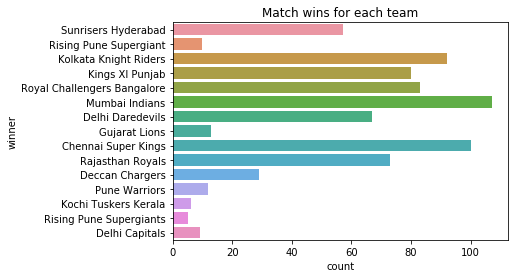

In [8]:
sns.countplot(y = matches.query('result == "normal"')['winner'])
plt.title('Match wins for each team')
plt.show()

### Rename teams

Some observed team names have incorrect names and some team names changed after some seasons. So Renaming these team names for convenience of preparing graphs

In [9]:
ipl_renames = {
    "Rising Pune Supergiant": "Rising Pune Supergiants",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Pune Warriors": "Rising Pune Supergiants",
    "Delhi Daredevils": "Delhi Capitals"
}

In [10]:
def ipl_ren(x, dict_i):
    """Function to get values from dictionary for the given key names"""
    return next((v for k, v in dict_i.items() if k == x), x)

In [11]:
# Winner
matches['winning_team'] = matches['winner'].apply(lambda x: ipl_ren(x, ipl_renames))

# Team 1
matches['team1'] = matches['team1'].apply(lambda x: ipl_ren(x, ipl_renames))

# Team 2
matches['team2'] = matches['team2'].apply(lambda x: ipl_ren(x, ipl_renames))

# Toss winner
matches['toss_winner'] = matches['toss_winner'].apply(lambda x: ipl_ren(x, ipl_renames))

# Drop winner column
matches.drop('winner', axis=1, inplace=True)

In [12]:
# Rename Id name in deliveries data
deliveries.rename(columns={"match_id": "id"}, inplace=True)

# Merging matches and deliveries data on Id
df = deliveries.merge(matches, on='id')

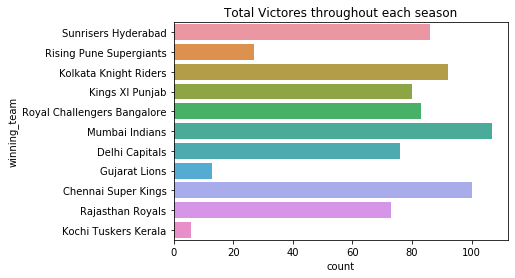

In [13]:
sns.countplot(y = matches.query('result == "normal"')['winning_team'])
plt.title('Total Victores throughout each season')
plt.show()

## Most runs by batsman

In [14]:
total_runs = df.groupby('batsman')['batsman_runs'].sum()
print("Player with the most runs :", total_runs.idxmax())
print("Total Runs :", total_runs.max())

Player with the most runs : V Kohli
Total Runs : 5434


batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64
--------------------------------------------------


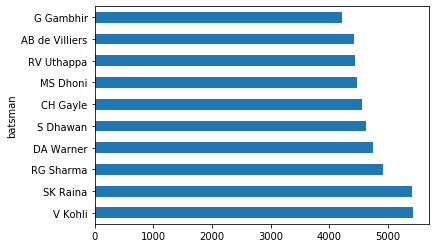

In [15]:
print(total_runs.sort_values(ascending=False).head(10))
print('-'*50)
total_runs.sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

### Batsman with most strike rate

In [16]:
strike = df.groupby('batsman')['batsman_runs'].agg({'runs': "sum", 'balls': "count"}).reset_index()
strike['strike_rate'] = strike.runs * 100 / strike.balls
strike.set_index('batsman', inplace=True)
strike

,runs,balls,strike_rate
batsman,,,
A Ashish Reddy,280,196,142.857143
A Chandila,4,7,57.142857
A Chopra,53,75,70.666667
A Choudhary,25,20,125.000000
A Dananjaya,4,5,80.000000
...,...,...,...
YV Takawale,192,183,104.918033
Yashpal Singh,47,67,70.149254
Younis Khan,3,7,42.857143


batsman
B Stanlake       250.000000
Umar Gul         205.263158
RS Sodhi         200.000000
S Sharma         200.000000
AD Russell       179.950187
Shahid Afridi    176.086957
I Malhotra       175.000000
S Curran         172.727273
K Gowtham        172.093023
SN Thakur        171.428571
Name: strike_rate, dtype: float64
--------------------------------------------------


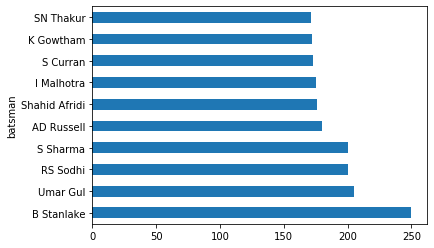

In [17]:
print(strike['strike_rate'].nlargest(10))
print('-'*50)

strike['strike_rate'].nlargest(10).plot(kind='barh')
plt.show()

### Batsman with the most sixes

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman_runs, dtype: int64
--------------------------------------------------


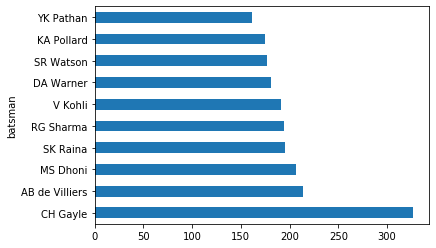

In [18]:
sixes = df.query('batsman_runs == 6').groupby('batsman')['batsman_runs'].count()
print(sixes.nlargest(10))
print('-'*50)
sixes.nlargest(10).plot(kind='barh')
plt.show()

### Batsman with most Boundaries

batsman
S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman_runs, dtype: int64
--------------------------------------------------


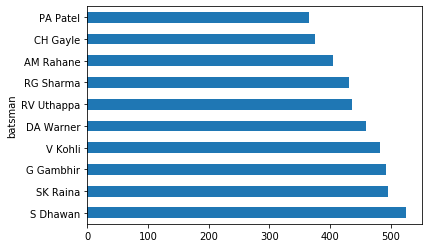

In [19]:
fours = df.query('batsman_runs == 4').groupby('batsman')['batsman_runs'].count()
print(fours.nlargest(10))
print('-'*50)
fours.nlargest(10).plot(kind='barh')
plt.show()

### Player with most man of the match

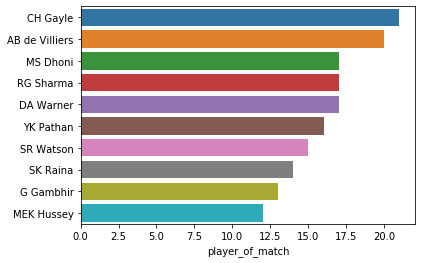

In [20]:
man_match = matches['player_of_match'].value_counts().nlargest(10)
sns.barplot(y=man_match.index, x=man_match)
plt.show()

## Best Bowlers throughout all seasons

In [21]:
bowlers1 = df.query('dismissal_kind != ["run out", "retired hurt", "obstructing the field"]')
bowl_df = bowlers1.groupby('bowler')['player_dismissed'].count()
print("Best Bowler :", bowl_df.idxmax())
print("Best score :", bowl_df.max())

Best Bowler : SL Malinga
Best score : 170


bowler
SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: player_dismissed, dtype: int64
--------------------------------------------------


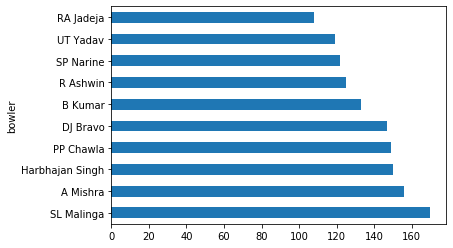

In [22]:
print(bowl_df.sort_values(ascending=False).head(10))
print('-'*50)
bowl_df.sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

### Most No balls

bowler
S Sreesanth    23
JJ Bumrah      22
I Sharma       21
A Mishra       20
SL Malinga     18
UT Yadav       18
AB Dinda       14
B Lee          13
JA Morkel      13
M Morkel       13
Name: noball_runs, dtype: int64
--------------------------------------------------


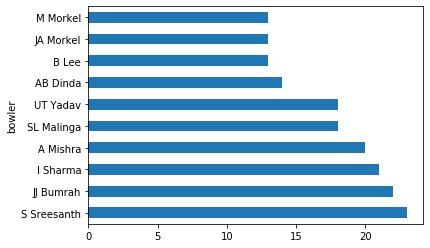

In [23]:
no_balls = df.query('noball_runs != 0').groupby('bowler')['noball_runs'].count()
print(no_balls.nlargest(10))
print('-'*50)
no_balls.nlargest(10).plot(kind='barh')
plt.show()

### CSK vs MI

In [24]:
csk_mi = df.query('bowling_team == ["Chennai Super Kings", "Mumbai Indians"] and batting_team == ["Chennai Super Kings", "Mumbai Indians"]')
csk_mi['id'].nunique()

28

In [25]:
csk_mi.groupby(['id', 'toss_winner', 'winning_team', 'inning','batting_team'])['total_runs'].sum()

id     toss_winner          winning_team         inning  batting_team       
67     Mumbai Indians       Chennai Super Kings  1       Chennai Super Kings    208
                                                 2       Mumbai Indians         202
96     Mumbai Indians       Mumbai Indians       1       Chennai Super Kings    156
                                                 2       Mumbai Indians         158
118    Chennai Super Kings  Mumbai Indians       1       Mumbai Indians         165
                                                 2       Chennai Super Kings    146
162    Mumbai Indians       Chennai Super Kings  1       Mumbai Indians         147
                                                 2       Chennai Super Kings    151
194    Mumbai Indians       Mumbai Indians       1       Chennai Super Kings    180
                                                 2       Mumbai Indians         181
211    Chennai Super Kings  Chennai Super Kings  1       Chennai Super Kings    165

In [26]:
# CSK vs MI
csk_mi.query('batting_team == "Chennai Super Kings" and bowling_team == "Mumbai Indians"').groupby(
    ['venue', 'season', 'winning_team'])['id'].nunique()

venue                                    season  winning_team       
Brabourne Stadium                        2010    Mumbai Indians         1
                                         2014    Chennai Super Kings    1
Dr DY Patil Sports Academy               2010    Chennai Super Kings    1
Dubai International Cricket Stadium      2014    Chennai Super Kings    1
Eden Gardens                             2013    Mumbai Indians         1
                                         2015    Mumbai Indians         1
Feroz Shah Kotla                         2013    Chennai Super Kings    1
M Chinnaswamy Stadium                    2012    Chennai Super Kings    1
M. A. Chidambaram Stadium                2019    Mumbai Indians         2
MA Chidambaram Stadium, Chepauk          2008    Chennai Super Kings    1
                                         2010    Chennai Super Kings    1
                                         2012    Mumbai Indians         1
                                         20

In [27]:
# Matches won by each team in different venues
matches.groupby(['venue', 'winning_team'])['id'].count().sort_values(ascending=False)

venue                                                 winning_team               
Eden Gardens                                          Kolkata Knight Riders          45
Wankhede Stadium                                      Mumbai Indians                 42
M Chinnaswamy Stadium                                 Royal Challengers Bangalore    34
MA Chidambaram Stadium, Chepauk                       Chennai Super Kings            34
Sawai Mansingh Stadium                                Rajasthan Royals               32
                                                                                     ..
OUTsurance Oval                                       Kings XI Punjab                 1
Punjab Cricket Association IS Bindra Stadium, Mohali  Kolkata Knight Riders           1
                                                      Mumbai Indians                  1
                                                      Royal Challengers Bangalore     1
ACA-VDCA Stadium                      

In [28]:
matches[['team1', 'team2', 'result']]

,team1,team2,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,normal
1,Mumbai Indians,Rising Pune Supergiants,normal
2,Gujarat Lions,Kolkata Knight Riders,normal
3,Rising Pune Supergiants,Kings XI Punjab,normal
4,Royal Challengers Bangalore,Delhi Capitals,normal
...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,normal
752,Chennai Super Kings,Mumbai Indians,normal
753,Sunrisers Hyderabad,Delhi Capitals,normal
754,Delhi Capitals,Chennai Super Kings,normal


In [29]:
matches.groupby('winning_team')['id'].count()

winning_team
Chennai Super Kings            100
Delhi Capitals                  77
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Rajasthan Royals                75
Rising Pune Supergiants         27
Royal Challengers Bangalore     84
Sunrisers Hyderabad             87
Name: id, dtype: int64

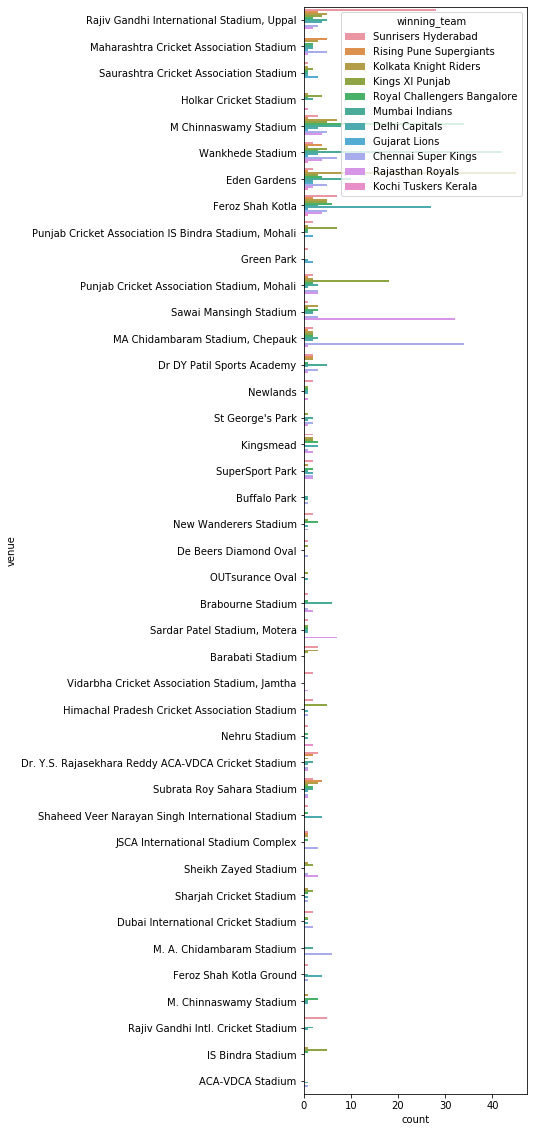

In [30]:
plt.figure(figsize=[4,20])
sns.countplot(y = matches['venue'], hue=matches['winning_team'])
plt.show()

In [31]:
matches['teams'] = [[i,j] for i, j in zip(matches['team1'], matches['team2'])]
matches['teams']

0      [Sunrisers Hyderabad, Royal Challengers Bangal...
1              [Mumbai Indians, Rising Pune Supergiants]
2                 [Gujarat Lions, Kolkata Knight Riders]
3             [Rising Pune Supergiants, Kings XI Punjab]
4          [Royal Challengers Bangalore, Delhi Capitals]
                             ...                        
751              [Kolkata Knight Riders, Mumbai Indians]
752                [Chennai Super Kings, Mumbai Indians]
753                [Sunrisers Hyderabad, Delhi Capitals]
754                [Delhi Capitals, Chennai Super Kings]
755                [Mumbai Indians, Chennai Super Kings]
Name: teams, Length: 756, dtype: object

### Effect of Toss win in IPL

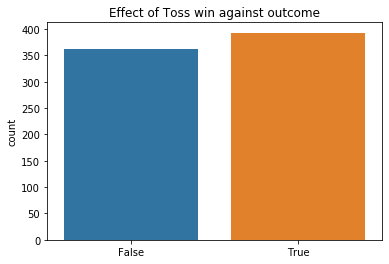

--------------------------------------------------


True     51.984127
False    48.015873
dtype: float64

In [32]:
toss_effect = matches['toss_winner'] == matches['winning_team']

sns.countplot(toss_effect)
plt.title('Effect of Toss win against outcome')
plt.show()
print('-'*50)
toss_effect.value_counts(normalize=2)*100

## Venue's Effect on Team victory

In [33]:
def check_venue(team):
    """Check for team's performance in venues"""
    plt.figure(figsize=[5,8])
    sns.countplot(y = matches.loc[matches['winning_team']==team,'venue'])
    plt.title(team+"'s victories")
    plt.show()

In [34]:
venue_names = {
    'MA Chidambaram Stadium, Chepauk': "M. A. Chidambaram Stadium",
    'Punjab Cricket Association IS Bindra Stadium, Mohali': "Punjab Cricket Association Stadium, Mohali",
    'IS Bindra Stadium': "Punjab Cricket Association Stadium, Mohali",
    'M Chinnaswamy Stadium': "M. Chinnaswamy Stadium",
    'ACA-VDCA Stadium': "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",
    'Rajiv Gandhi Intl. Cricket Stadium': "Rajiv Gandhi International Stadium, Uppal",
    'Feroz Shah Kotla': "Feroz Shah Kotla Ground"
}

In [35]:
matches['venue'] = matches['venue'].apply(lambda x: ipl_ren(x, venue_names))

#### Mumbai Indians

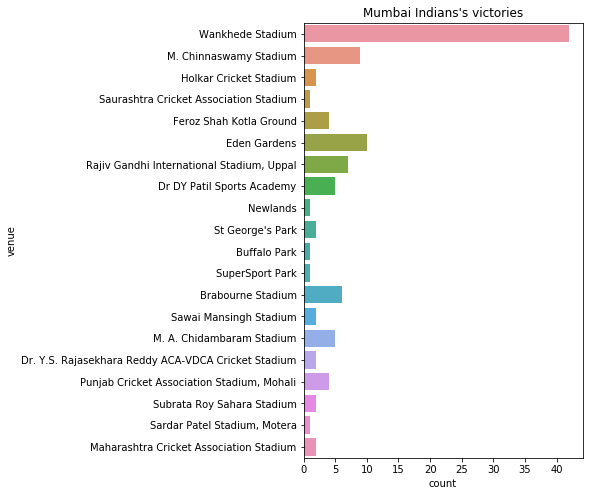

In [36]:
check_venue("Mumbai Indians")

#### Chennai Super Kings

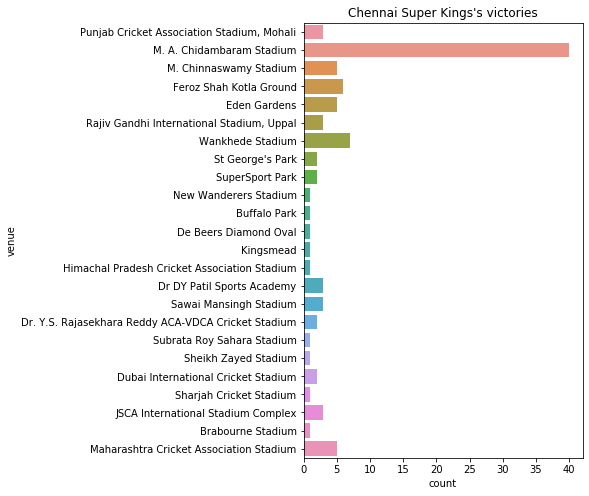

In [37]:
check_venue('Chennai Super Kings')

#### Kolkata Knight Riders

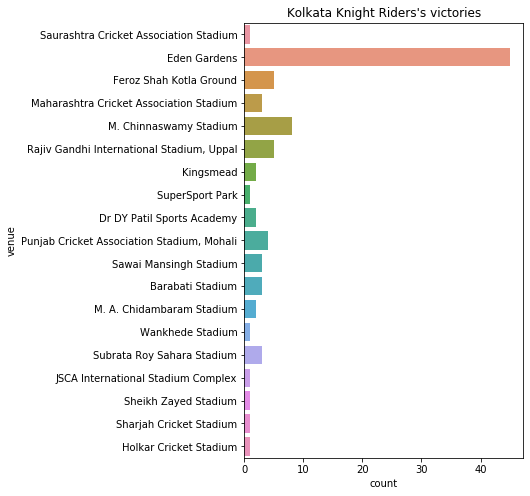

In [38]:
check_venue('Kolkata Knight Riders')

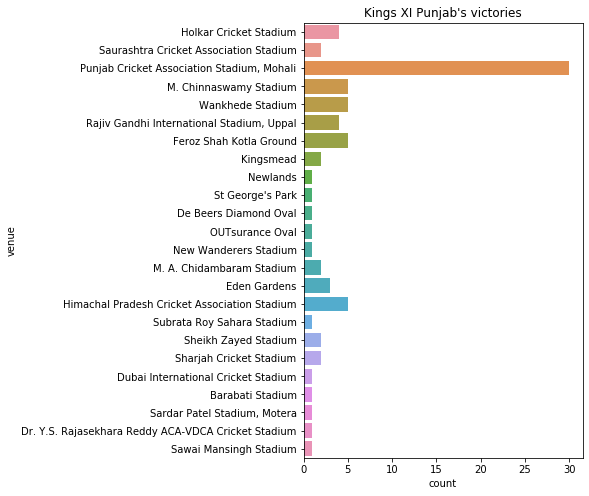

In [39]:
check_venue('Kings XI Punjab')

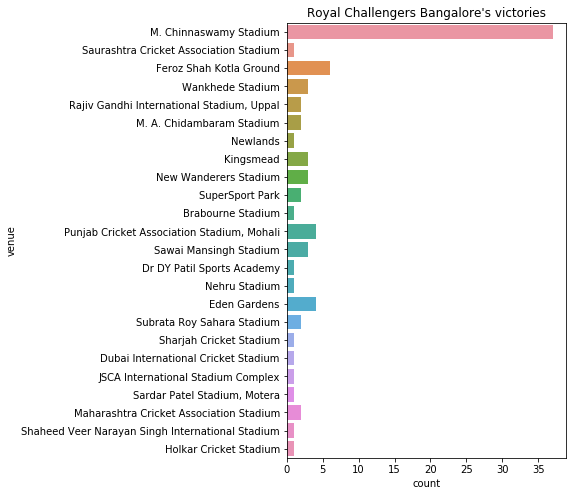

In [40]:
check_venue('Royal Challengers Bangalore')

## Team Average Score

In [41]:
match_score = df.groupby(['batting_team','season','id','inning']).apply(lambda x: x['total_runs'].sum()).reset_index(name='score')

In [42]:
match_score

,batting_team,season,id,inning,score
0,Chennai Super Kings,2008,61,1,240
1,Chennai Super Kings,2008,67,1,208
2,Chennai Super Kings,2008,71,2,152
3,Chennai Super Kings,2008,74,1,178
4,Chennai Super Kings,2008,79,1,169
...,...,...,...,...,...
1523,Sunrisers Hyderabad,2019,11339,1,232
1524,Sunrisers Hyderabad,2019,11342,2,165
1525,Sunrisers Hyderabad,2019,11342,3,7
1526,Sunrisers Hyderabad,2019,11345,1,179


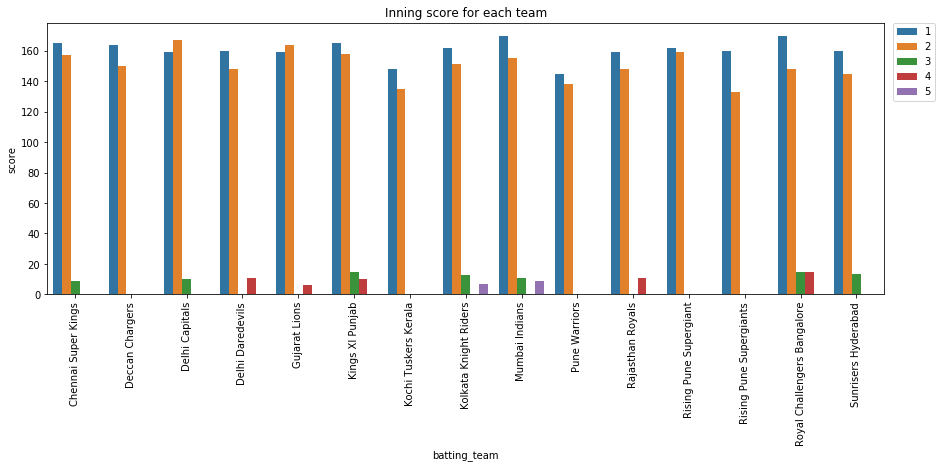

In [43]:
plt.figure(figsize=[15,5])
inn_match = match_score.groupby(['batting_team','inning'])['score'].median().reset_index()
sns.barplot(x='batting_team', y='score', hue='inning', data=inn_match)
plt.title('Inning score for each team')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

## Overall Winning percentage

In [44]:
def winning_percentage(data):
    """FInd the total winning percentage of various teams"""
    teams = data['team1'].unique().tolist()
    years = data['season'].unique().tolist()
    
    name, match, win_m, loss_m, tie_m, no_m, win_p, year_n = [], [], [], [], [], [], [], []

    for j in years:
        for i in teams:
            team_df = data[((data['team1']==i) | (data['team2']==i)) | (data['season']==j)]
            
            # Season
            year_n.append(j)

            # Team Name
            name.append(i)

            # Total matches
            total = team_df.shape[0]
            match.append(total)

            # Win counts
            wins = team_df.query('result == "normal"')[team_df['winning_team']==i].shape[0]
            win_m.append(wins)

            # Loss counts
            loss = team_df.query('result == "normal"')[team_df['winning_team']!=i].shape[0]
            loss_m.append(loss)

            # Tie counts
            tie = team_df.query('result == "tie"').shape[0]
            tie_m.append(tie)

            # No results
            no_result = team_df.query('result == "no result"').shape[0]
            no_m.append(no_result)

            # win percentage
            wp = round((wins/total)*100, 2)
            win_p.append(wp)
    
    x = {
        'team_name': name,
        'season': year_n,
        'total_matches_played': match,
        'wins': win_m,
        'loss': loss_m,
        'tie': tie_m,
        'no_result': no_m,
        'wins_percentage': win_p
    }
    
    return pd.DataFrame(x).sort_values(by='season')

In [45]:
win_perc = winning_percentage(matches)

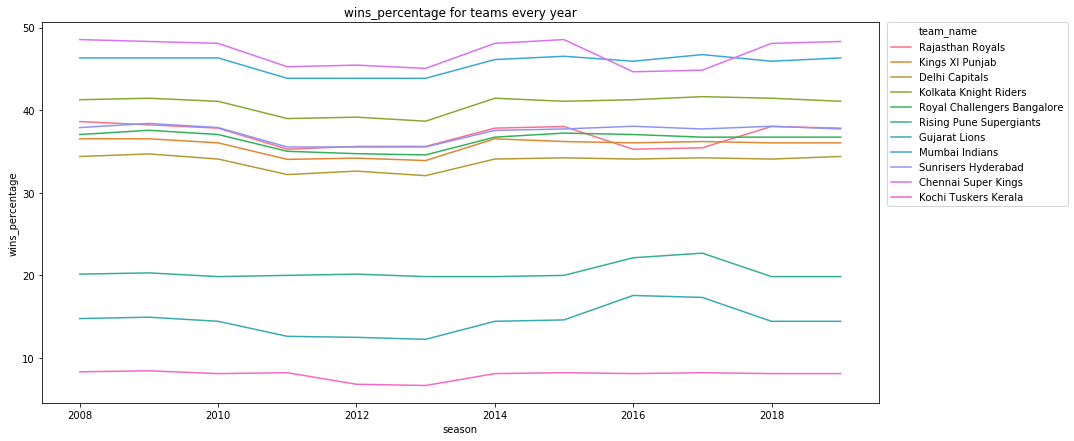

In [46]:
plt.figure(figsize=[15, 7])
sns.lineplot(x='season', y='wins_percentage', hue='team_name', data=win_perc)
plt.title('wins_percentage for teams every year')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

In [47]:
overall_win = win_perc.groupby('team_name')[['total_matches_played', 'wins', 'loss', 'tie', 'no_result']].sum().reset_index()

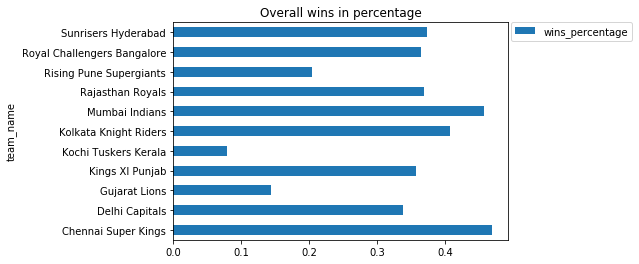

In [48]:
overall_win['wins_percentage'] = overall_win['wins']/overall_win['total_matches_played']
over_graph = overall_win[['team_name','wins_percentage']].set_index('team_name')
over_graph.plot(kind='barh')
plt.title('Overall wins in percentage')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

### Overall Strike Rate

In [49]:
def get_sr(data_i):    
    """Get the data for strike rate for each team"""
    
    team = data_i['batting_team'].unique().tolist()
    
    name, str1, str2, str3 = [], [], [], []
    
    for i in team:
        name.append(i)
        
        pp1 = data_i.query('over < 6').loc[data_i['batting_team']==i, :]
        mid = data_i.query('over >= 6 and over < 15').loc[data_i['batting_team']==i, :]
        pp2 = data_i.query('over >= 15 and over <=20').loc[data_i['batting_team']==i, :]

        sr1 = (pp1['total_runs'].values/pp1.shape[0]).sum()*100
        str1.append(sr1)
        
        sr2 = (mid['total_runs'].values/mid.shape[0]).sum()*100
        str2.append(sr2)
        
        sr3 = (pp2['total_runs'].values/pp2.shape[0]).sum()*100
        str3.append(sr3)

    data_ipl = {
        "team_name": name,
        "Powerplay": str1,
        "Middle": str2,
        "Last 5 overs": str3
    }

    return pd.DataFrame(data=data_ipl)

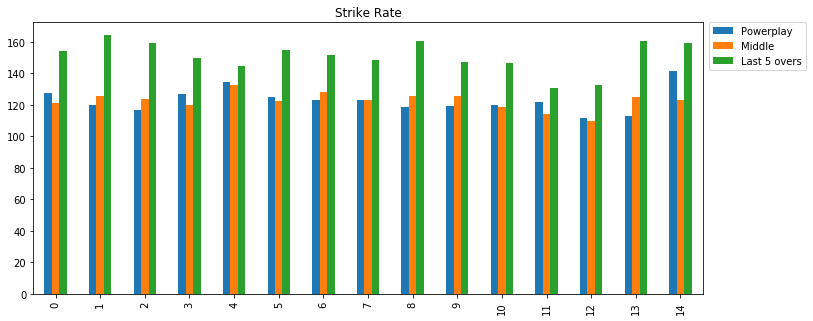

--------------------------------------------------


,team_name,Powerplay,Middle,Last 5 overs
0,Sunrisers Hyderabad,127.418398,121.252115,154.327453
1,Royal Challengers Bangalore,120.071429,125.444525,164.083641
2,Mumbai Indians,116.458051,123.780429,158.864916
3,Rising Pune Supergiant,126.760563,119.907940,149.438202
4,Gujarat Lions,134.574468,132.753449,144.316997
5,Kolkata Knight Riders,124.602466,122.149938,154.491662
6,Kings XI Punjab,122.787570,128.253869,151.508361
7,Delhi Daredevils,122.919563,123.291110,148.255814
8,Chennai Super Kings,118.582338,125.472219,160.710461
9,Rajasthan Royals,119.204570,125.342295,147.355003


In [50]:
get_sr(deliveries).plot(kind='bar', figsize=[12,5])
plt.title('Strike Rate')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()
print('-'*50)

get_sr(deliveries)